# Lasso Regression (L1 Regularization) — Complete Conceptual Notes

---

## 1. What Lasso Regression Is

Lasso Regression is a linear regression model with **L1 regularization**, used to:

- Reduce overfitting
- Perform **automatic feature selection**
- Reduce model complexity

The loss function is:

$$
J(W) = \sum_{i=1}^{n} (y_i - X_i W)^2 + \lambda \sum_{j=1}^{p} |w_j|
$$

Here:
- First term → Mean Squared Error
- Second term → L1 penalty
- $\lambda \ge 0$ → regularization strength

---

## 2. Relation to Linear Regression

If:

$
\lambda = 0
$

Then:

$$
\text{Lasso Regression} = \text{Ordinary Least Squares}
$$

If:

$
\lambda > 0
$

Then:
- Coefficients are penalized
- Model complexity reduces

---

## 3. Key Difference from Ridge Regression

| Property | Ridge (L2) | Lasso (L1) |
|--------|-----------|------------|
| Penalty | $$\sum w_j^2$$ | $$\sum |w_j|$$ |
| Coefficients | Shrink | Shrink + zero |
| Feature Selection | ❌ No | ✅ Yes |
| Sparsity | ❌ No | ✅ Yes |

---

## 4. Effect of Increasing λ on Coefficients

As $\lambda$ increases:

$$
\lambda \uparrow \Rightarrow |w_j| \downarrow
$$

But unlike Ridge:

$$
\exists \; j \; \text{such that} \; w_j = 0
$$

This means:
- Some features are **completely removed**
- Model becomes sparse

---

## 5. Exact Zero Coefficients (Core Property)

Lasso can produce:

$$
w_j = 0 \quad \text{for less important features}
$$

This **never happens in Ridge Regression**.

Reason:
- Absolute value penalty creates **sharp corners**
- Optimization hits axes directly

---

## 6. Feature Selection via Lasso

When:

$$
w_j = 0
$$

Then:
- Feature $X_j$ has **no contribution**
- Feature can be safely removed

Thus Lasso performs:

$$
\text{Model fitting} + \text{Feature selection}
$$

in a **single step**.

---

## 7. Impact of λ Scale

- Small $\lambda$:
  - Behaves like linear regression
  - Overfitting possible

- Medium $\lambda$:
  - Some coefficients become zero
  - Optimal balance

- Large $\lambda$:
  - Most coefficients zero
  - Underfitting

Extreme case:

$$
\lambda \to \infty \Rightarrow W = 0
$$

---

## 8. Larger Coefficients Are Penalized More

For two coefficients:

$$
|w_a| > |w_b|
$$

Penalty comparison:

$$
|w_a| > |w_b| \Rightarrow \lambda |w_a| > \lambda |w_b|
$$

Therefore:
- Larger coefficients shrink faster
- Smaller ones may survive longer

---

## 9. Bias–Variance Tradeoff

As $\lambda$ increases:

$$
\text{Bias} \uparrow
$$

$$
\text{Variance} \downarrow
$$

Interpretation:
- Lasso reduces variance by removing features
- But increases bias if too many features are removed

---

## 10. Bias–Variance Curve Behavior

- Low $\lambda$:
  - Low bias
  - High variance
  - Overfitting

- High $\lambda$:
  - High bias
  - Low variance
  - Underfitting

Optimal $\lambda$ lies where:

$$
\text{Bias} \approx \text{Variance}
$$

---

## 11. Loss Function Shape (Key Geometry Insight)

L1 penalty introduces **non-smooth corners**.

Penalty constraint:

$$
\sum_{j=1}^{p} |w_j| \le c
$$

This forms a **diamond-shaped constraint**.

Loss contours intersect corners ⇒ coefficients hit zero.

---

## 12. Why Lasso Produces Sparsity (Mathematical Intuition)

- L1 norm is **non-differentiable at zero**
- Gradient-based optimization stalls at zero
- Coefficients get stuck at zero

This is the **core reason for feature elimination**.

---

## 13. Comparison of Optimization Behavior

| Method | Solution Behavior |
|------|-------------------|
| Linear Regression | Free minimization |
| Ridge | Smooth shrinkage |
| Lasso | Axis-aligned solutions |

---

## 14. When to Use Lasso

Use Lasso when:

- Number of features is large
- Many features are irrelevant
- Model interpretability is important
- Feature selection is required

---

## 15. When NOT to Use Lasso

Avoid Lasso when:

- Features are highly correlated
- You want all features retained
- True signal is distributed across many features

---

## 16. Lasso vs Ridge (Decision Rule)

- Want **feature selection** → Lasso
- Want **all features with shrinkage** → Ridge
- Want both → Elastic Net

---

## 17. Practical Observation from Experiments

As $\lambda$ increases:

- Few important features survive
- Many coefficients become zero
- Eventually all coefficients go to zero → underfitting

---

## 18. Effect on Model Complexity

Lasso reduces effective dimensionality:

$$
p_{\text{effective}} < p
$$

This improves:
- Generalization
- Training stability
- Interpretability

---

## 19. Interview-Ready One-Line Answer

> **Lasso Regression uses L1 regularization to shrink coefficients and force some to exactly zero, thereby reducing overfitting and performing automatic feature selection.**

---

## 20. Final Takeaway

$$
\text{Lasso} = \text{Regularization} + \text{Feature Selection}
$$

- Sparse model
- Interpretable
- Powerful for high-dimensional data


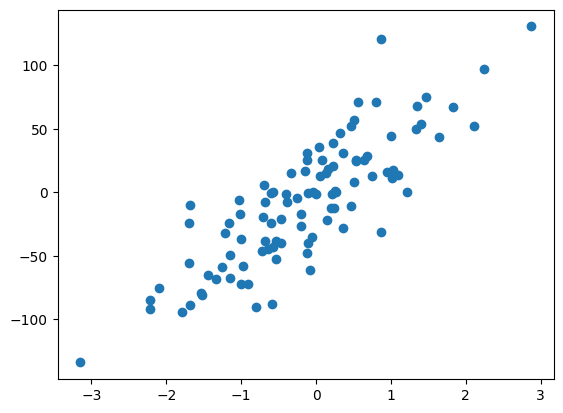

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=27,random_state=12)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[38.6096458]
-3.924162333173089


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.641e+04, tolerance: 1.944e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

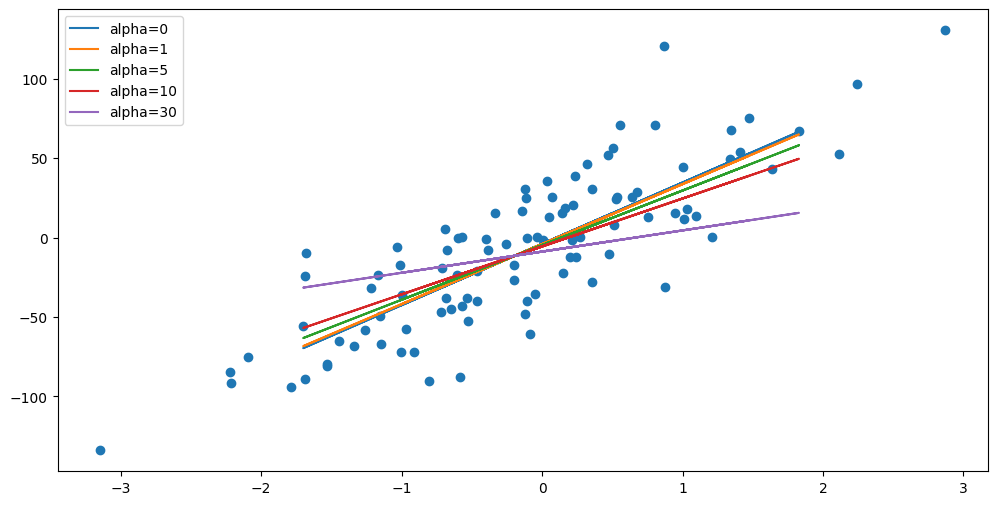

In [10]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

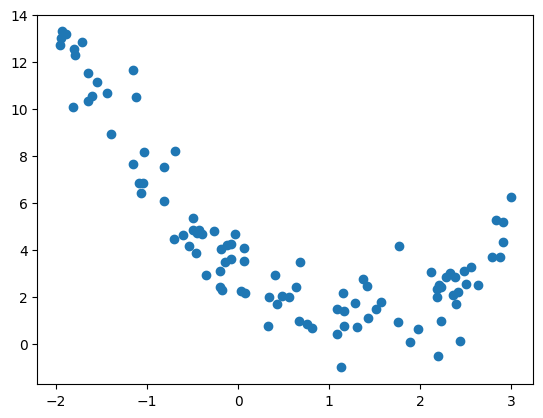

In [13]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 1.2 * x1 ** 2 - 3* x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e+01, tolerance: 1.318e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

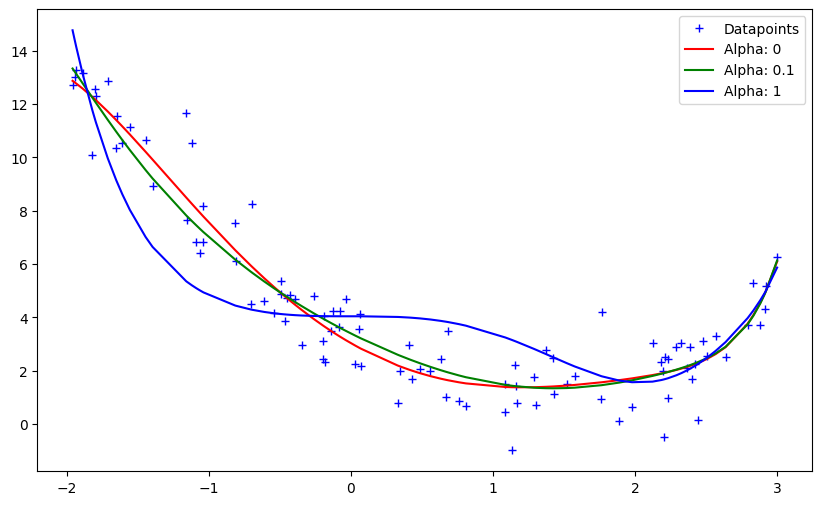

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()